# Communicate Data Findings Using Ford GoBike System Data


## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.
Attributes included in the data set are: trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [13]:
df = pd.read_csv('data.csv')
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


### What is the structure of your dataset?

> Your answer here!
The data is a csv with 3254326 rows and 16 columns. It contains data about bike rides taken by a cycling tracking app of riders in the greater San Franscico, California area. The columns contain information about the start and finish locations of the ride, the riders themselves, duration, date and time of the ride, if it was a bike share trip, and whether the rider was a paid subscriber to the app or not. In short, it's the who, when, where, and a little bit of the why of bike rides.


### What is/are the main feature(s) of interest in your dataset?

> Your answer here!
The most interesting feature to me is the id of the inddividual bikes themselves. It is an artificial key in the database but uniquely identfying each bike rentable in the service will lead to some interesting observations. Do people take the bikes back and forth between the same stations? Do people keep renting the same bike? Does each bike get rented each day? What station is a bike most likely to be rented at? There are numerous questions that could be asked.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!
When the most interesting feature is statistics that can be concluded about the individual bikes, the bike ID will naturally be the most helpful for making conclusion. It is worth noting that that ID contains no actual information about the bike, so a bit paradoxically, the most helpful data column will have none of the data used for conclusions!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables. You need to invistage at least 4 variables

C:\Users\Phillip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[  10   11   12 ... 7106 7107 7108]


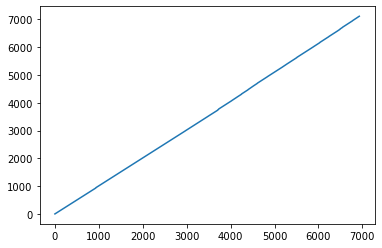

In [5]:
#gonna start with a rediculously basic one. Is there any meaning to the value of the bike IDs?
#This is to confirm our observation that it is an artificial key
#Looking  at it, it appears to be an incremented integer so we should see a basic y=x+c if we graph this and confirm our theory.
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

df = pd.read_csv('data.csv')
df.head()


a = np.array(df["bike_id"])
a.sort()
uniqueIDs=np.unique(a)
print(uniqueIDs)
plt.plot(uniqueIDs)


#as we thought, the bike_id is an arbitrarily chosen first integer that is incremented by one for each bike since we see a
#perfect y=x slope Bike_id is an artificial key.



Text(0, 0.5, 'Times Rented')

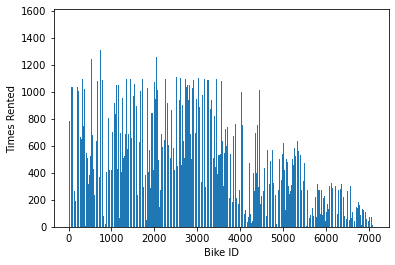

In [11]:
#Next observation: each row represents an instance that a bike was rented through the app service.
#Each time that a bike's ID shows up means that it was rented
#Were any specific bikes rented significantly more than others? 
#A bar graph will let us see if any bikes are rented significantly more than others

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

df = pd.read_csv('data.csv')
df.head()

#There are 6930 unique values and 3254326 rows. This makes an average of 470(rounded) average number of rentals.
a = np.array(df["bike_id"])
a.sort()
unique, counts =np.unique(a, return_counts=True)
#print(unique)
#print(counts)
plt.bar(unique,counts)
plt.xlabel("Bike ID")
plt.ylabel("Times Rented")


<BarContainer object of 394 artists>

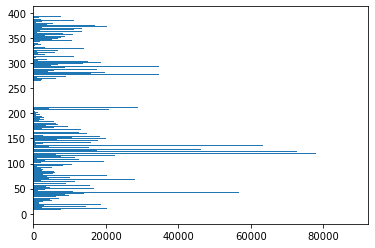

In [34]:
#It is VERY clear from the previous investigations that some bikes are rented far more tham others
#Some were rented over 1,000 times, others so few times they didn't even show up on the chart.
#The next thing I want to know is where are people going on the bikes?
#Is there a similar distributions among the end stations?
#Are certain destinations immensely more popular than others as is seen among the bikes?
#Another bar chart will visualize the data of this well
#Should go horizontal so that the station names are readable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

df = pd.read_csv('data.csv')

#np.unique() doesn't work on string arrays so gotta use a different technique
a = np.array(df["end_station_name"])
unique= set(a)
u=list(unique)
b=list(a)
s=len(unique)
#now to count up all the values in the list.
vals=[]
x=0
while(x<s):
    vals.append(b.count(u[x]))
    x=x+1

y_pos=np.arange(len(u))
plt.barh(y_pos,vals)


0
394


<BarContainer object of 1 artists>

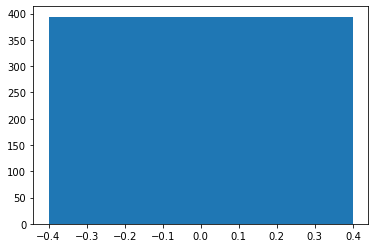

In [2]:
#This bad graph shows an unexpected trend.
#Are there really a large number of stations that no one goes to as it appears?
#This will be easy to investigate as we can split the data we previously collected into zero and nonzero values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

df = pd.read_csv('data.csv')
a = np.array(df["end_station_name"])
unique= set(a)
u=list(unique)
b=list(a)
s=len(unique)
#now to count up all the values in the list.
vals=[]
x=0

while(x<s):
    vals.append(b.count(u[x]))
    x=x+1

#Now instead of bar graphing this, we cut it into zero and nonzeros.
x=0
zeros=0
nonzeros=0
while(x<len(vals)):
    if(vals[x]==0):
        zeros=zeros+1
    else:
        nonzeros=nonzeros+1
    x=x+1

#Now compare the lengths of the 2 bars

print(zeros)
print(nonzeros)

plt.bar(zeros,nonzeros)


#So every station did have at least one ride go to it after all, there are just a lot of very unpopular stations.
#Is there a similar pattern with where rides start?

<BarContainer object of 394 artists>

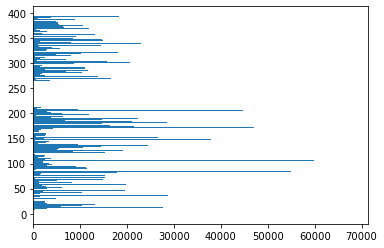

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

df = pd.read_csv('data.csv')

#np.unique() doesn't work on string arrays so gotta use a different technique
a = np.array(df["start_station_name"])
unique= set(a)
u=list(unique)
b=list(a)
s=len(unique)
#now to count up all the values in the list.
vals=[]
x=0
while(x<s):
    vals.append(b.count(u[x]))
    x=x+1

y_pos=np.arange(len(u))
plt.barh(y_pos,vals)
#Again, there appears to be a large number of stations no one leaves from. Is this true?

0
394


<BarContainer object of 1 artists>

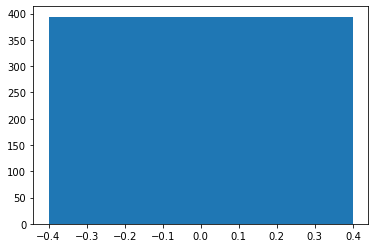

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

df = pd.read_csv('data.csv')
a = np.array(df["start_station_name"])
unique= set(a)
u=list(unique)
b=list(a)
s=len(unique)
#now to count up all the values in the list.
vals=[]
x=0

while(x<s):
    vals.append(b.count(u[x]))
    x=x+1

#Now instead of bar graphing this, we cut it into zero and nonzeros.
x=0
zeros=0
nonzeros=0
while(x<len(vals)):
    if(vals[x]==0):
        zeros=zeros+1
    else:
        nonzeros=nonzeros+1
    x=x+1

#Now compare the lengths of the 2 bars

print(zeros)
print(nonzeros)

plt.bar(zeros,nonzeros)
#Again, there is the same pattern, some stations are MUCH more popular than other 

C:\Users\Phillip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[80110 78800 45768 ...   292   471   356]


C:\Users\Phillip\anaconda3\lib\fractions.py:420: RuntimeWarning: overflow encountered in longlong_scalars
  return Fraction(a.numerator * db - b.numerator * da,


874
557
931.8411881860557


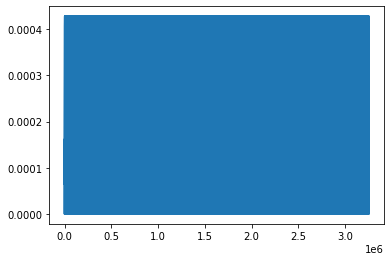

In [12]:
#Next, since I need to investigate a fourth variable, I want to look at the duration of rides.
#How long do they last? What is the distribution of this information?
#Will look at relationships with this data later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import statistics
from scipy.stats import norm

%matplotlib inline

df = pd.read_csv('data.csv')
a = np.array(df["duration_sec"])
print(a)

mean=statistics.mean(a)
med =statistics.median(a)
sd = statistics.stdev(a)
print(mean)
print(med)
print(sd)
#plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
scale=10
size=100
b =norm.pdf(a, mean, sd)

plt.plot(b)

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [ ]:
Not sure what "markdown plot" mean but I left multiple code comments to the same effect throughout my cells

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!
Yes, there was an extreme variance within the stations, with some stations being utilized thousands of times, others only being utilized a few times. I didn't do any tranformations because I'm going to investigate this more deeply when I explore the relationships between some of the variables in the next section.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!
The stations had a distribution that was unexpected. I checked that there was no error that there were stations no one ever visited counted within the counts. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration). 
You need to invistage at least 4 pairs variables.

C:\Users\Phillip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


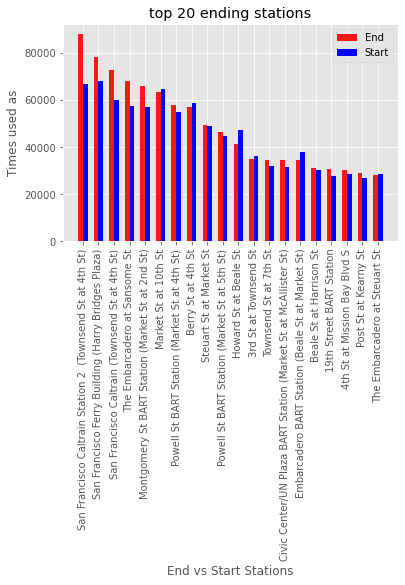

In [45]:
#First, I will look at the stations. Are the most popular end stations also the most common start stations?
#Let's look at the top 20 end stations to confirm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import statistics as stat #built in module for means standard dev and such

#Need to get every station uniquely, then count up instances of it.
df = pd.read_csv('data.csv')
#make a dictionary of the station name, times gone to, times starting from.
#Graph the top 20 as a double bar graph

#first get the unique values of strings.
a = np.array(df["end_station_name"])
unique= set(a)
u=list(unique)
b = list(a)

EndStations = {
    "Name": 0, #placeholder, name and number of times a station is visited
}
#vals=[]
x=0
while (x<len(u)):
    EndStations.update({u[x]: b.count(u[x])})
    #vals.append(b.count(u[x]))
    x=x+1
#now sort the dictionary and keep the first 15 values
sortedEnds ={}
sorted_keys=sorted(EndStations, key = EndStations.get, reverse=True)
for w in sorted_keys:
    sortedEnds[w]=EndStations[w]

    
#We now have a sorted dictionary. Let's take a list of the first 20 keys
top20 = list(sortedEnds.keys())[:20]
top20v = list(sortedEnds.values())[:20]

#Now we count up all the starting locations, and cross check the dictionary
c = np.array(df["start_station_name"])
unique2=set(c)
#u2=list(unique2)
d=list(c)
x=0

startStations={}

while (x<len(top20)):
    startStations.update({top20[x]: d.count(top20[x])})
    x=x+1

#Now to graph this metaphorical puppy  
plt.style.use("ggplot")
n=20
fig, ax = plt.subplots()
index=np.arange(n)
bar_width=0.3
opacity=0.9
ax.bar(index, top20v, bar_width, alpha=opacity, color='r', label='End')
ax.bar(index+bar_width, startStations.values(), bar_width, color='b', label='Start')

ax.set_xlabel("End vs Start Stations")
ax.set_ylabel("Times used as")
ax.set_title("top 20 ending stations")
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(top20, rotation=90)
ax.legend()
plt.show()

#So some stations have significantly more use as an endpoint than a starting point. 
#Specifically, the five most common end points are used as a starting point significantly less.
#Does the inverse of this hold true as well?
#Are the 5 most common starting points used as an end point far less?

   

C:\Users\Phillip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


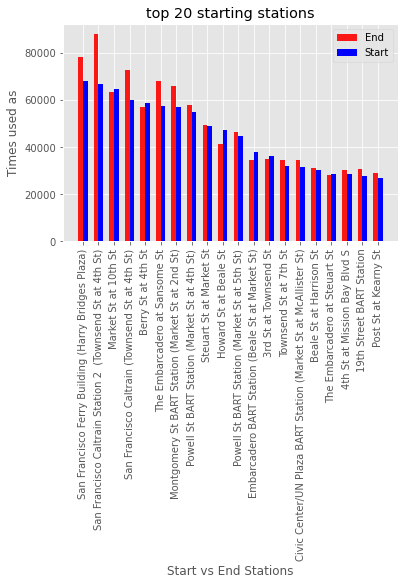

In [49]:
#Is the inverse of the previous also true? That is, the 5 most popular start stations are used far less as end stations?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import statistics as stat #built in module for means standard dev and such

#Need to get every station uniquely, then count up instances of it.
df = pd.read_csv('data.csv')
#make a dictionary of the station name, times gone to, times starting from.
#Graph the top 20 as a double bar graph

#first get the unique values of strings.
a = np.array(df["start_station_name"])
unique= set(a)
u=list(unique)
b = list(a)

StartStations = {
    "Name": 0, #placeholder, name and number of times a station is visited
}
#vals=[]

x=0
while (x<len(u)):
    StartStations.update({u[x]: b.count(u[x])})
    #vals.append(b.count(u[x]))
    x=x+1
#now sort the dictionary and keep the first 20 values
sortedStarts ={}
sorted_keys=sorted(StartStations, key = StartStations.get, reverse=True)
for w in sorted_keys:
    sortedStarts[w]=StartStations[w]

    
#We now have a sorted dictionary. Let's take a list of the first 20 keys
top20 = list(sortedStarts.keys())[:20]
top20v = list(sortedStarts.values())[:20]

#Now we count up all the starting locations, and cross check the dictionary
c = np.array(df["end_station_name"])
unique2=set(c)
#u2=list(unique2)
d=list(c)
x=0

endStations={}

while (x<len(top20)):
    endStations.update({top20[x]: d.count(top20[x])})
    x=x+1

#Now to graph this metaphorical puppy  
plt.style.use("ggplot")
n=20
fig, ax = plt.subplots()
index=np.arange(n)
bar_width=0.3
opacity=0.9
ax.bar(index, startStations.values(), bar_width, alpha=opacity, color='r', label='End')
ax.bar(index+bar_width, top20v, bar_width, color='b', label='Start')

ax.set_xlabel("Start vs End Stations")
ax.set_ylabel("Times used as")
ax.set_title("top 20 starting stations")
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(top20, rotation=90)
ax.legend()
plt.show()

#So the inverse is not true
#The most common starting stations do not have a lot more departing bikes than arriving bikes
#The opposite is true, most of them in fact, have more arriving bikes than departing bikes
#It can be inferred from this that in general, there is a flow of bikes from the less popular stations to the most.
#Someone managing this transportation system should be aware of this to make sure that all the bikes don't "pile up"
#at just the most popular stations. Have trucks or similar occassionally drop off bikes from the large to small stations

In [ ]:
#Do the bikes that get rented more have longer or shorter rides?
#First get a list of the most commonly rented bikes
#Is the inverse of the previous also true? That is, the 5 most popular start stations are used far less as end stations?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import statistics as stat #built in module for means standard dev and such

#dataframe
df = pd.read_csv('data.csv')

a = np.array(df["bike_id"])
b = np.array(df["duration_sec"])
IDs, count =np.unique(a, return_counts=True)

counts=list(count)
x=0
idList=[]
while(x<21):
        temp=counts.index(max(counts))
        idList.append(IDs[temp])
        counts[temp]=0
        x=x+1
print(idList)

mostRentedIDs=[]
for y in idList:
    mostRentedIDs.append(IDs[y])
print(mostRentedIDs)

avgTime=stat.mean(df["duration_sec"])
print(avgTime)

#add up the average duration of the IDs that were there
x=0 
z=0
val=0
count=0
top20avg=[]
while(x<(len(mostRentedIDs))-1):
    if(z==len(a)):
        top20avg.append(avg)
        #print(top20avg)
        #print(x)
        z=0
        x+=1
    if(mostRentedIDs[x]==a[z]):
        val+=b[z]
        count+=1
        avg=val/count
    z+=1
    
above =[]
below =[]

x=0
while(x<len(top20avg)):
    if(top20avg[x]<avgTime):
        below.append(top20avg[x])
    if(top20avg[x]>avgTime):
        above.append(top20avg[x])
    x+=1
fig=plt.figure()
fig_range=[500,525,550,575,600,625,650,675,700,725,750,775,800,825,850,875,900,925,950,975]
ax.scatter(below,fig_range,  color='teal')
ax.scatter(above,above,  color='orange')
ax=fig.add_axes([0,0,50,50])
ax.set_xlabel("Teal dots represent bikes with shorter than avg ride times, orange above")
ax.set_ylabel("Average Ride Duration")
ax.set_title("Average ride times of most used bikes")
plt.show()
#print(a)
#print(b)
#We now hav an array of the IDs and the counts ordered with each other. 
#sortedCounts=list(counts)
#sortedCounts.sort(reverse=True)
#sortedCounts=sortedCounts[:20]
#print(sortedCounts)

#Now get the index of the ids that correlate to the most rented bikes


#Need an array of the most rented bike IDs not the counts

#we know from previous cells that there are 394 bikes in the service. Let's round that to 400, then consider the top 5%, or 20
#We'll make a plot of 2 bars, the average duration the top 20 bikes are ridden, and the other bar will be the average
#The y axis should be time
#A scatter plot would be best for this

#Now to work on the time aspect. Calculate the average
#

[4452, 4319, 4464, 1161, 4320, 4417, 2663, 2692, 2545, 4318, 2016, 4390, 232, 3379, 2174, 4405, 2387, 1396, 2185, 4343, 3961]
[4532, 4388, 4545, 1182, 4389, 4494, 2684, 2713, 2566, 4387, 2037, 4461, 242, 3407, 2195, 4481, 2408, 1417, 2206, 4412, 4010]
874.3222548454748


In [ ]:
#Do the bikes that get rented more tend to go to the most popular endpoints?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections. You need to generate at least 2 plots for this section.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!